In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
import itertools
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from textwrap import dedent
from sklearn.metrics import precision_recall_fscore_support, log_loss
from vigor.predicate import Predicate

from vigor import get_args, get_final_res

device = "cuda" if torch.cuda.is_available() else "cpu"

C:\Users\brian\anaconda3\envs\vigor\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
with open('predicates_1733094817.pkl', 'rb') as f:
    all_predicates = pkl.load(f)

In [4]:
all_data_paths = {'data': '../data/data_1733093714.csv', 'rand': '../data/rand_1733093714.csv'}
all_data = {k:pd.read_csv(v) for k,v in all_data_paths.items()}
all_data_train_test = {k: v.sample(frac=.8) for k,v in all_data.items()}
all_data_train_test = {k: (v, all_data[k].loc[all_data[k].index.isin(v.index)]) for k,v in all_data_train_test.items()}

In [5]:
params = {
    'n_iter': 1000,
    'lr': 1e-2,
    'momentum': 0.4,
    'weight_decay_mu': 0,
    'weight_decay_a': 0,
    'nesterov': False,
    'balanced': False,
    'init_width': 2
}

In [6]:
metrics = {
    ('precision', 'recall', 'f1'): lambda x,y: np.array(precision_recall_fscore_support(x, y>.5, zero_division=True))[:,-1][:-1]
}

In [7]:
all_params = [params]
all_metrics = [metrics]
args = get_args(all_data_train_test, all_predicates, all_params, all_metrics)
# args = get_args({'rand': all_data_train_test['rand']}, {'rand': all_predicates['rand']}, all_params, all_metrics)

In [8]:
%%time
res = get_final_res(args, all_data_train_test, all_predicates, all_params, all_metrics)

0 ('data', 'predicates', 0, 0)
1 ('data', 'nobre', 0, 0)
2 ('data', 'rand', 0, 0)
3 ('rand', 'predicates', 0, 0)
4 ('rand', 'nobre', 0, 0)
5 ('rand', 'rand', 0, 0)
CPU times: total: 2min 57s
Wall time: 9min 34s


('data', 'predicates', 0, 0)


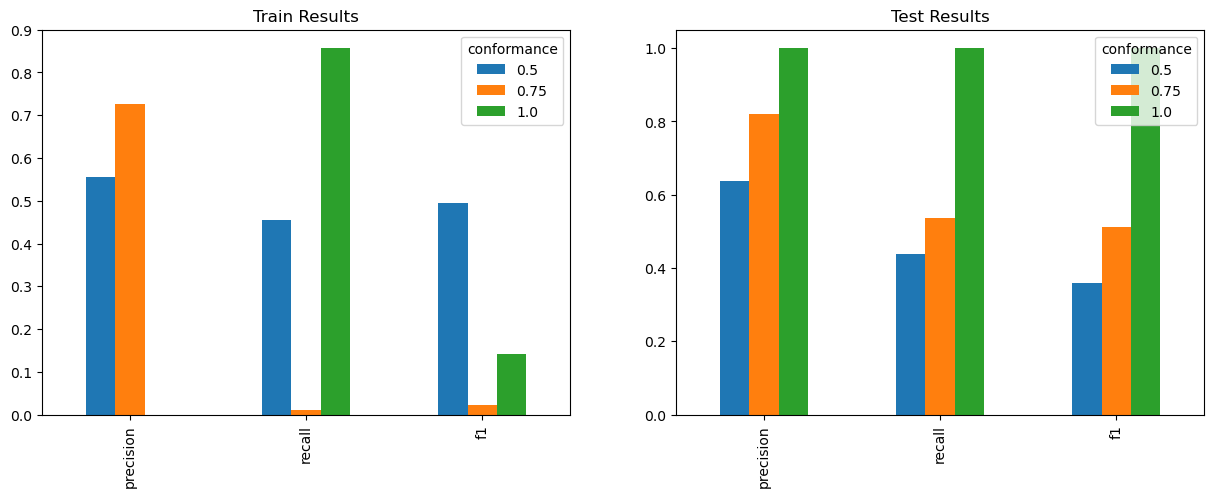

('data', 'nobre', 0, 0)


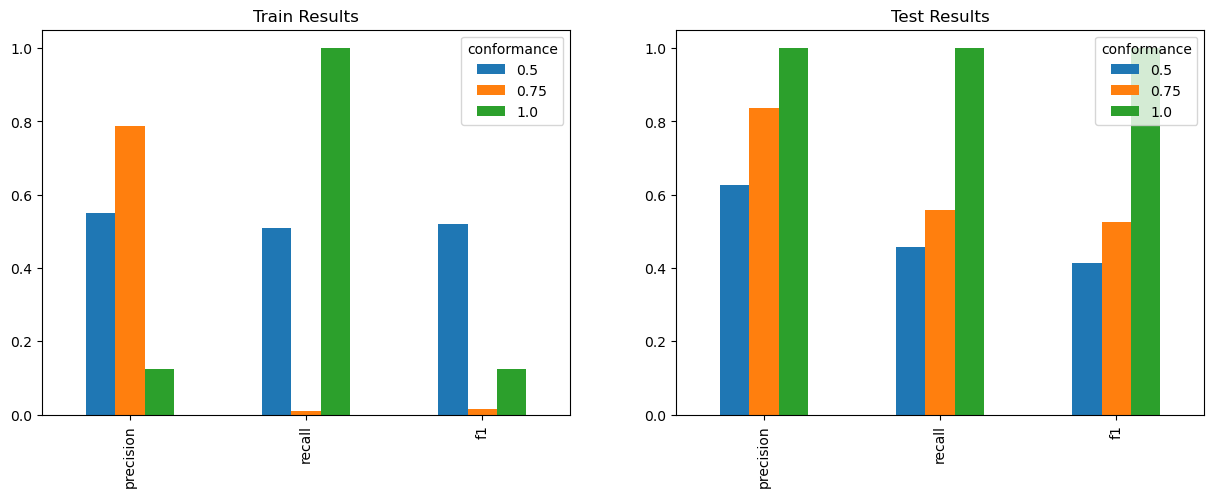

('data', 'rand', 0, 0)


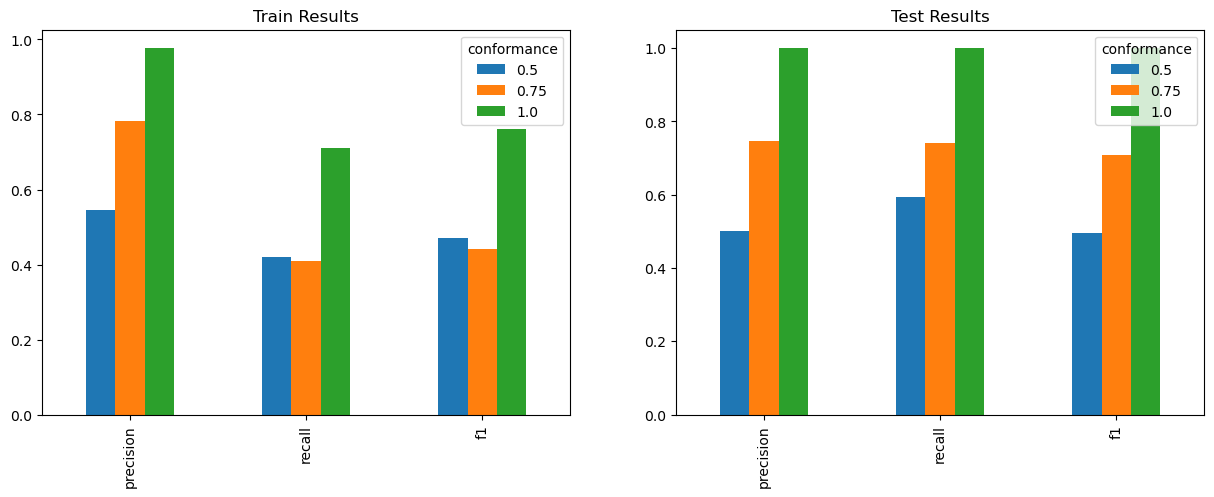

('rand', 'predicates', 0, 0)


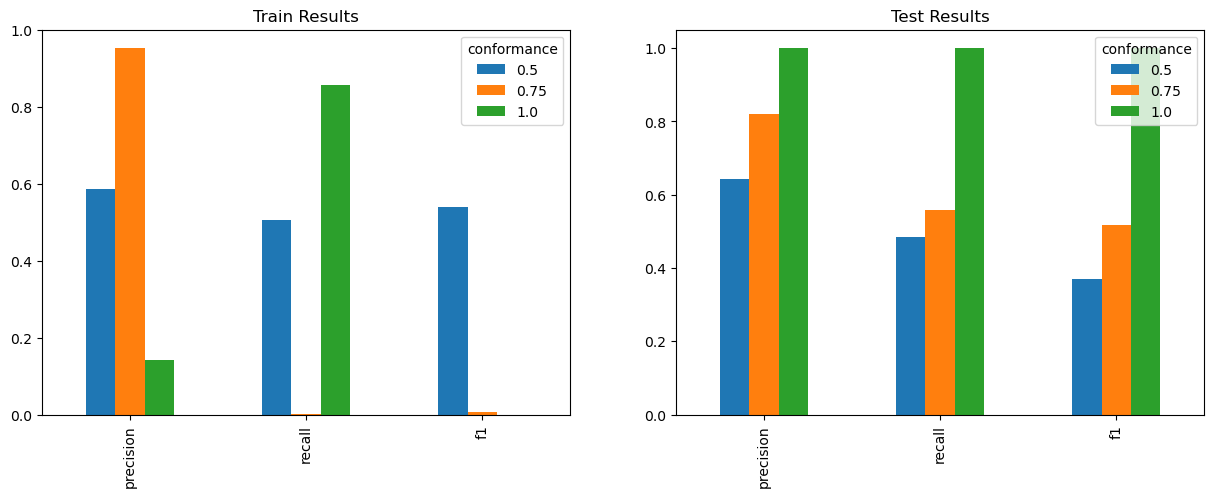

('rand', 'nobre', 0, 0)


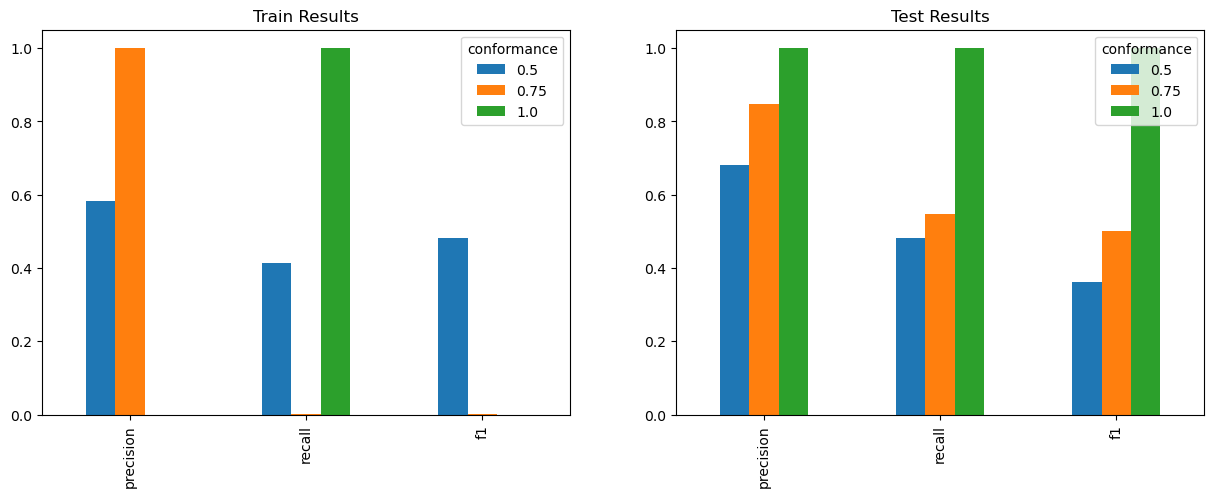

('rand', 'rand', 0, 0)


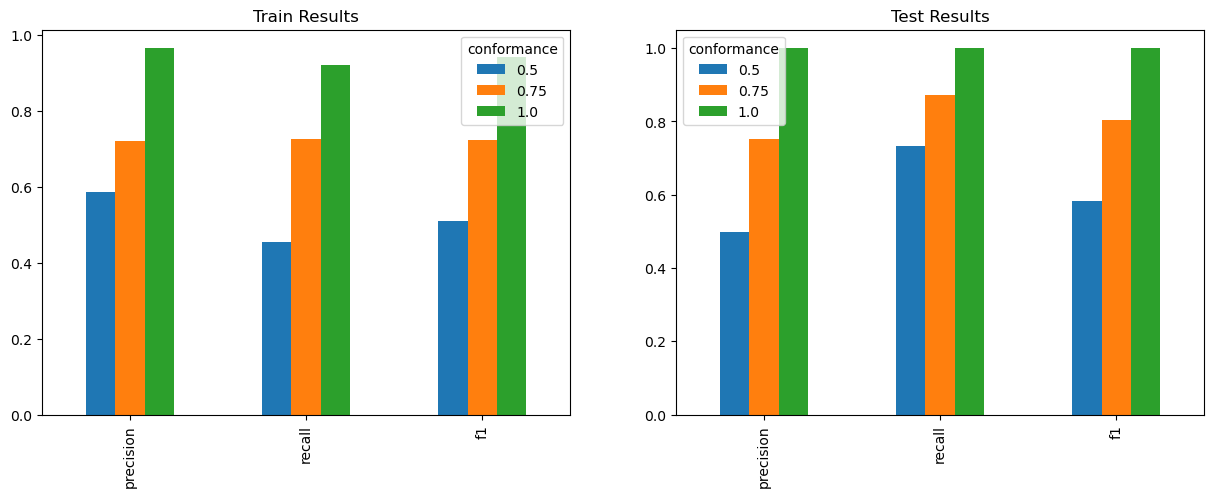

In [9]:
for params,params_res in res.items():
    print(params)
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    train_avg = params_res['train'].groupby('conformance')[['precision', 'recall', 'f1']].mean()
    train_avg.T.plot.bar(ax=ax[0])
    test_avg = params_res['test'].groupby('conformance')[['precision', 'recall', 'f1']].mean()
    test_avg.T.plot.bar(ax=ax[1])
    
    ax[0].set_title('Train Results')
    ax[1].set_title('Test Results')
    plt.show()